# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
ratings = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

    #Since Rating Values are stores in class "rating-10" they are extracted from itemprop "ratingValue" avoiding unnecessary html strings
    for para in parsed_content.find_all("div", {"class": "rating-10"}):
        rating_value = para.find("span", {"itemprop": "ratingValue"}).get_text()
        ratings.append(rating_value)
        ratings = [x for x in ratings if x != '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5']



Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
#These reviews and ratings are stored as a dataframe
df = pd.DataFrame()
df["reviews"] = reviews
df['ratings'] = ratings
df.head()

,reviews,ratings
0,✅ Trip Verified | My family and I have flown ...,4
1,✅ Trip Verified | This has been by far the wo...,2
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2
3,Not Verified | BA is not treating its premium ...,4
4,✅ Trip Verified | 24 hours before our departu...,1


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.head()

,reviews,ratings
0,✅ Trip Verified | My family and I have flown ...,4
1,✅ Trip Verified | This has been by far the wo...,2
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2
3,Not Verified | BA is not treating its premium ...,4
4,✅ Trip Verified | 24 hours before our departu...,1


**Data Cleaning**

Removing Unnecessary Texts from the data

In [6]:
df['reviews'] = df['reviews'].str.split('|').str[-1].str.strip()
df.head()

,reviews,ratings
0,My family and I have flown mostly on British A...,4
1,This has been by far the worst service I have ...,2
2,In Nov 2022 I booked and paid for a return jou...,2
3,BA is not treating its premium economy passeng...,4
4,24 hours before our departure on BA059 to Cape...,1


In [7]:
df.dtypes
#Here it is noticed that ratings are object which are supposed to be numeric values

reviews    object
ratings    object
dtype: object

Conversion of Ratings from String to Numeric

In [8]:
df['ratings'] = pd.to_numeric(df['ratings'])

Checking for missing values

In [9]:
df.isnull().sum()

reviews    0
ratings    0
dtype: int64

In [10]:
df['ratings'].value_counts()

1     330
2     120
10    101
3      97
9      82
8      71
4      59
7      52
5      49
6      39
Name: ratings, dtype: int64

In [11]:
df.ratings.describe()

count    1000.000000
mean        4.256000
std         3.314732
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        10.000000
Name: ratings, dtype: float64

Installation of NLP Libraries (nltk,string)

In [12]:
#!pip install nltk


In [13]:
import nltk

In [14]:

#nltk.download('all')

Importing the Necessary Libraries (word_tokenize, PorterStemmer, WordNetLemmatizer, stopwords)

In [15]:

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer #including this for stemming.
from nltk.stem import WordNetLemmatizer #for lemmatization.
from nltk.corpus import stopwords #for remmoving stopwords.
import string # to deal with strings & perform operations on it.


Removal of Punctuation and Numbers from Reviews

In [16]:
def remove_punctuation_and_numbers(text):
    # remove punctuation marks using string.punctuation
    no_punctuation = "".join([word for word in text if word not in string.punctuation])
    # tokenize the text into words
    tokens = nltk.word_tokenize(no_punctuation)
    # remove numbers from tokens
    tokens_no_num = [token for token in tokens if not token.isdigit()]
    # join the tokens into a string
    text_clean = " ".join(tokens_no_num)
    return text_clean

df['cleanr'] = df['reviews'].apply(remove_punctuation_and_numbers)

Lemmatization of Reviews along with their Part of Speech Tags

In [17]:
from nltk.corpus import wordnet
#Creating Lemmatizer object for Lemmatization
lemmatizer = WordNetLemmatizer()
#Mapping Respective Tags recognizable to Lemmatizer
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
#Function to lemmatize data with pos tags
def lemmatize_sentence(sentence):
  #Storing Part of Speech Tags
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # Extracting words and pos tags along with stored pos tags from nltk
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []

    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
          # Lemmatization of words
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    # Storing the lemmatized words in a sentence
    return " ".join(lemmatized_sentence)

df['lemmatized'] = df['cleanr'].apply(lemmatize_sentence)

In [18]:
df['lemmatized']

0      My family and I have fly mostly on British Air...
1      This have be by far the bad service I have hav...
2      In Nov I book and pay for a return journey to ...
3      BA be not treat its premium economy passenger ...
4      hour before our departure on BA059 to Cape Tow...
                             ...                        
995    Glasgow to Miami via London Glasgow to Heathro...
996    London Heathrow to Budapest After so much disa...
997    Budapest to London Heathrow The flight depart ...
998    London to Toronto Group of people age from to ...
999    Madrid to Heathrow I fly with BA on a regular ...
Name: lemmatized, Length: 1000, dtype: object

Removing Stopwords

In [19]:
def stopwordsrem(user_input):
  # Converting the Data to lower case
  user_input= user_input.lower()
  # Tokenization of data to words
  tokens = word_tokenize(user_input)
  # Storing the stopwords in a set
  stop_words = set(stopwords.words('english'))

  filtered_sentence = []

  for w in tokens:
      if w not in stop_words:
        # Filtering the stop words
          filtered_sentence.append(w)
          fs = " ".join(filtered_sentence)
  return(fs)

df['stopwordsr'] = df['cleanr'].apply(stopwordsrem)


In [20]:
df.head()

,reviews,ratings,cleanr,lemmatized,stopwordsr
0,My family and I have flown mostly on British A...,4,My family and I have flown mostly on British A...,My family and I have fly mostly on British Air...,family flown mostly british airways last years...
1,This has been by far the worst service I have ...,2,This has been by far the worst service I have ...,This have be by far the bad service I have hav...,far worst service plane obvious flying economy...
2,In Nov 2022 I booked and paid for a return jou...,2,In Nov I booked and paid for a return journey ...,In Nov I book and pay for a return journey to ...,nov booked paid return journey new zealand ret...
3,BA is not treating its premium economy passeng...,4,BA is not treating its premium economy passeng...,BA be not treat its premium economy passenger ...,ba treating premium economy passengers respect...
4,24 hours before our departure on BA059 to Cape...,1,hours before our departure on BA059 to Cape To...,hour before our departure on BA059 to Cape Tow...,hours departure ba059 cape town heathrow thurs...


## Sentiment Analysis using **VADER** model

In [21]:
#Importing Necessary libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Creating an object for sentiment analyzer function
sia = SentimentIntensityAnalyzer()

In [22]:
# Calculating the Sentiment score ranging from -1 to +1
df['scores'] = df['lemmatized'].apply(lambda x: sia.polarity_scores(x))

In [23]:
#Creating Groups for Sentiment Analysis of Reviews
def emotion(value):
    if value >= 0.5:
        return 'Positive'
    elif value < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Creating a feature for Sentiment group
df['Sentiment'] = df['scores'].apply(lambda x: emotion(x['compound']))

In [24]:
#Extracting the overall sentiment score
df['compound_value'] = df['scores'].apply(lambda x: x['compound'])

In [25]:
df.head()

,reviews,ratings,cleanr,lemmatized,stopwordsr,scores,Sentiment,compound_value
0,My family and I have flown mostly on British A...,4,My family and I have flown mostly on British A...,My family and I have fly mostly on British Air...,family flown mostly british airways last years...,"{'neg': 0.034, 'neu': 0.888, 'pos': 0.078, 'co...",Positive,0.9316
1,This has been by far the worst service I have ...,2,This has been by far the worst service I have ...,This have be by far the bad service I have hav...,far worst service plane obvious flying economy...,"{'neg': 0.058, 'neu': 0.891, 'pos': 0.05, 'com...",Negative,-0.2621
2,In Nov 2022 I booked and paid for a return jou...,2,In Nov I booked and paid for a return journey ...,In Nov I book and pay for a return journey to ...,nov booked paid return journey new zealand ret...,"{'neg': 0.099, 'neu': 0.871, 'pos': 0.03, 'com...",Negative,-0.9232
3,BA is not treating its premium economy passeng...,4,BA is not treating its premium economy passeng...,BA be not treat its premium economy passenger ...,ba treating premium economy passengers respect...,"{'neg': 0.094, 'neu': 0.826, 'pos': 0.08, 'com...",Neutral,0.1134
4,24 hours before our departure on BA059 to Cape...,1,hours before our departure on BA059 to Cape To...,hour before our departure on BA059 to Cape Tow...,hours departure ba059 cape town heathrow thurs...,"{'neg': 0.065, 'neu': 0.881, 'pos': 0.054, 'co...",Negative,-0.4166


In [26]:
#Import WordCloud Libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

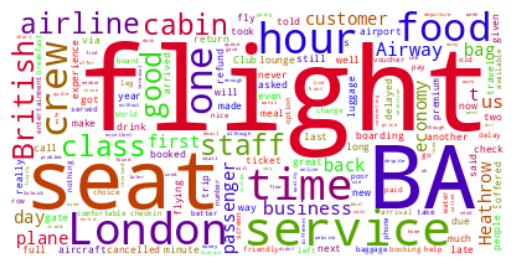

In [33]:
# Concatenate text from 'cleanr' column into a single string
text = ' '.join(df['cleanr'])

# Generate word cloud
word_cloud = WordCloud(collocations=False, background_color='white',colormap='brg').generate(text)

# Display word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Visualization

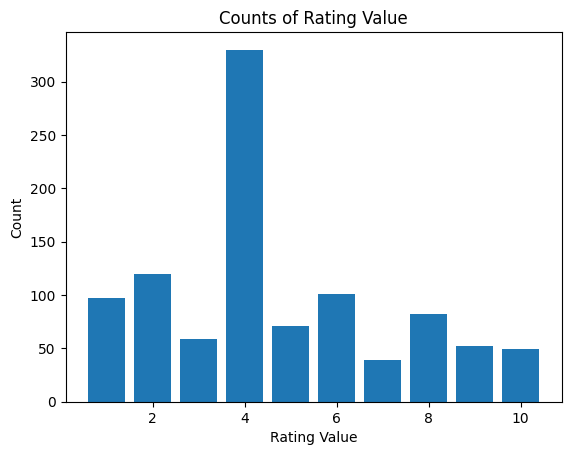

In [28]:
# Bar plot for rating value counts
plt.bar(df['ratings'].unique(), df['ratings'].value_counts().sort_index())
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.title('Counts of Rating Value')
plt.show()

Text(0.5, 1.0, 'Top 5 Ratings')

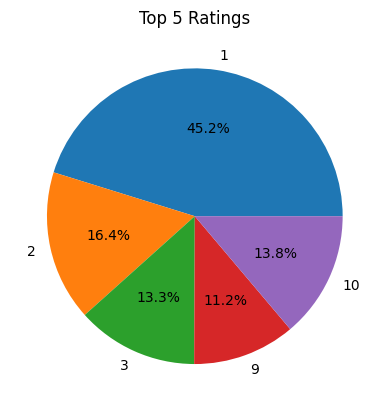

In [29]:
#Pie Chart for the percentage of top 5 ratings
top_5 = df['ratings'].value_counts().head(5).sort_index()
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%')
plt.title('Top 5 Ratings')

Text(0.5, 1.0, 'Sentiment Composition')

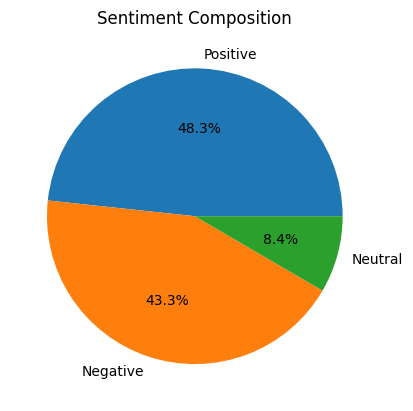

In [30]:
#Pie Chart for Sentiment Composition
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%')
plt.title('Sentiment Composition')

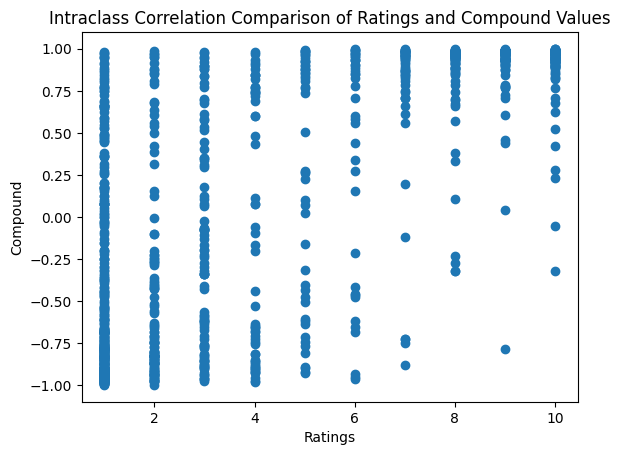

In [31]:
#Intraclass Correlation to show the accurace of review sentiment with the rating

plt.scatter(df['ratings'], df['compound_value'])
plt.xlabel('Ratings')
plt.ylabel('Compound')
plt.title('Intraclass Correlation Comparison of Ratings and Compound Values')
plt.show()

Following Insights can be drawn from the above :

    Sentiment Analysis:
        53.7% of the reviews are negative, 19.9% are neutral, and 25.4% are positive. The majority of the reviews tend to be negative.
    Areas for Improvement:
        The most commonly mentioned areas for improvement are seat type or cabin, service, food, crew, and time based on reviews.
    Review Distribution:
        The average rating is 4.256 out of 10, indicating a relatively lower satisfaction level overall.
    Variation in Ratings:
        The ratings range from 1 to 10, with a standard deviation of 3.314732.
        This suggests a wide variation in customer opinions and experiences, emphasizing the importance of diversity and addressing the areas mentioned in the reviews.
    Majority Negative and Low Ratings:
        More than half of the reviews are negative, suggesting a significant number of dissatisfied customers and indicating a need for improvements to enhance customer satisfaction.
